In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading the Dataset

In [2]:
dataset = pd.read_csv('diabetes_data_upload.csv')
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


### Dropping Missing Values

In [3]:
dataset = dataset.dropna()
print('number of null values = ', dataset.isnull().sum().sum())

number of null values =  0


### Describing the Dataset

In [4]:
dataset_shape = dataset.shape   #(Row, Column)
dataset_summary = dataset.describe() #Summary of data with count mean avg
print("Shape of the dataset = ", dataset_shape)
print("Summary of the dataset", dataset_summary)

Shape of the dataset =  (520, 17)
Summary of the dataset               Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


In [5]:
dataset = dataset.rename(columns={'class':'Diabetes'})
dataset.columns=dataset.columns.str.capitalize()
print("Attributes of dataset:")
print(*list(dataset.columns),sep='\n')

Attributes of dataset:
Age
Gender
Polyuria
Polydipsia
Sudden weight loss
Weakness
Polyphagia
Genital thrush
Visual blurring
Itching
Irritability
Delayed healing
Partial paresis
Muscle stiffness
Alopecia
Obesity
Diabetes


### Visualising the Dataset

Text(0.5, 1.0, 'Diabetes vs Non-Diabetes Patients')

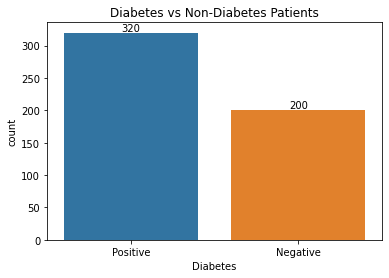

In [6]:
l = sns.countplot(x = 'Diabetes', data=dataset)
l.bar_label(l.containers[0])
l.set_title('Diabetes vs Non-Diabetes Patients')

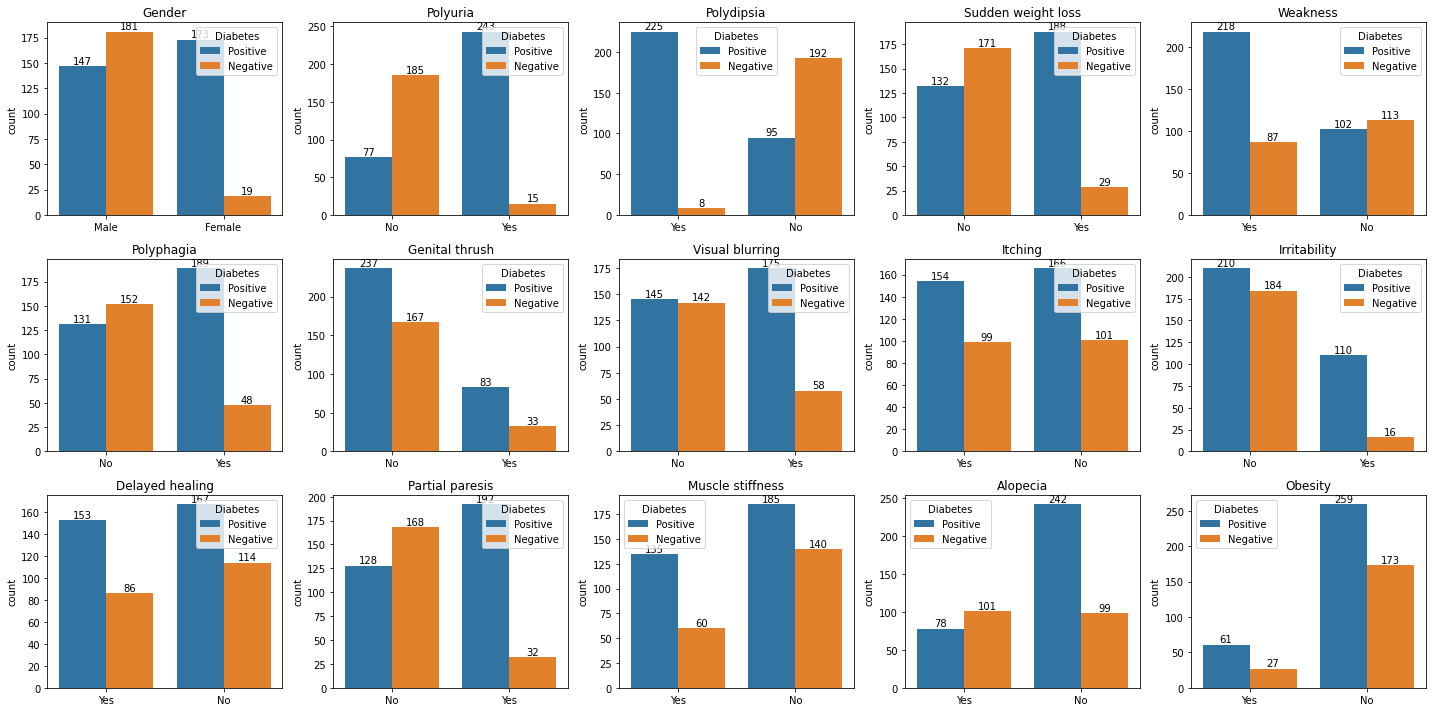

In [7]:

fig = plt.figure(figsize=(20,10))

count = 1
for column in dataset.columns:
    if column == 'Age' or column == 'Diabetes':
        continue
    
    ax1 = fig.add_subplot(3,5,count)
    g = sns.countplot( x=column, hue='Diabetes',data=dataset, ax=ax1)
    g.bar_label(g.containers[0])
    g.bar_label(g.containers[1])
    g.set_xlabel( "" , size = 1 )
    g.set_title(column)
    count = count + 1

plt.close(2)
plt.close(3)
plt.tight_layout()

### Visualising Age Distribution 

              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


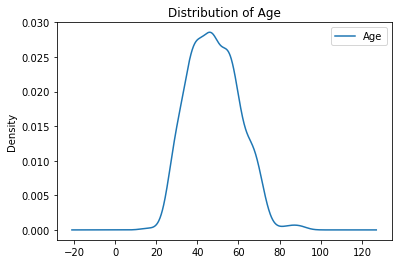

In [8]:
dataset[['Age']].plot.kde(title='Distribution of Age')
print(dataset[['Age']].describe())

In [9]:
category = pd.cut(dataset.Age, bins=[15,30,45,60,90], labels=['Young','Adult','Middle Age','Old'])
dataset_age = dataset
dataset_age.insert(5,'Age Group',category)

Text(0.5, 1.0, 'Diabetes patients within age groups')

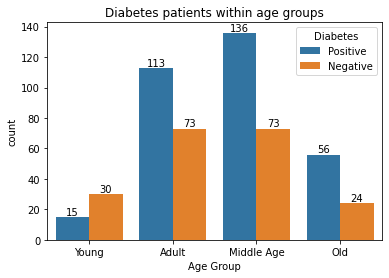

In [10]:
g = sns.countplot( x='Age Group', hue='Diabetes',data=dataset_age)
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
g.set_title('Diabetes patients within age groups')

### Cleaning the Dataset

In [11]:
dataset.replace(to_replace="Yes", value=1, inplace=True)
dataset.replace(to_replace="No", value=0, inplace=True)
dataset.replace(to_replace="Positive", value=1, inplace=True)
dataset.replace(to_replace="Negative", value=0, inplace=True)
dataset.replace(to_replace="Male", value=1, inplace=True)
dataset.replace(to_replace="Female", value=0, inplace=True)

## Correlation in Dataset

In [12]:
corr = dataset.corr(method='pearson')
corr.style.background_gradient(cmap='YlGnBu').set_precision(3) 

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,0.063,0.200,0.137,0.065,0.225,0.316,0.097,0.403,0.297,0.202,0.258,0.233,0.308,0.322,0.140,0.109
Gender,0.063,1.000,-0.269,-0.312,-0.282,-0.124,-0.220,0.209,-0.208,-0.052,-0.014,-0.102,-0.332,-0.091,0.328,-0.005,-0.449
Polyuria,0.200,-0.269,1.000,0.599,0.447,0.263,0.374,0.087,0.235,0.088,0.238,0.150,0.442,0.153,-0.144,0.127,0.666
Polydipsia,0.137,-0.312,0.599,1.000,0.406,0.332,0.317,0.028,0.331,0.129,0.203,0.116,0.442,0.181,-0.311,0.099,0.649
Sudden weight loss,0.065,-0.282,0.447,0.406,1.000,0.283,0.244,0.090,0.069,-0.005,0.140,0.088,0.264,0.110,-0.203,0.169,0.437
Weakness,0.225,-0.124,0.263,0.332,0.283,1.000,0.180,0.028,0.301,0.309,0.147,0.336,0.273,0.263,0.090,0.046,0.243
Polyphagia,0.316,-0.220,0.374,0.317,0.244,0.180,1.000,-0.064,0.294,0.144,0.239,0.264,0.374,0.320,-0.053,0.030,0.343
Genital thrush,0.097,0.209,0.087,0.028,0.090,0.028,-0.064,1.000,-0.148,0.125,0.161,0.136,-0.196,-0.100,0.205,0.054,0.110
Visual blurring,0.403,-0.208,0.235,0.331,0.069,0.301,0.294,-0.148,1.000,0.291,0.077,0.178,0.364,0.412,0.015,0.109,0.251
Itching,0.297,-0.052,0.088,0.129,-0.005,0.309,0.144,0.125,0.291,1.000,0.114,0.453,0.117,0.216,0.267,0.002,-0.013


### Dividing the dataset by Age and Gender

In [13]:
dataset_young = dataset_age.loc[(dataset_age['Age Group'] == 'Young')]
dataset_adult = dataset_age.loc[(dataset_age['Age Group'] == 'Adult')]
dataset_middle = dataset_age.loc[(dataset_age['Age Group'] == 'Middle Age')]
dataset_old = dataset_age.loc[(dataset_age['Age Group'] == 'Old')]
dataset_male = dataset.loc[(dataset['Gender'] == 1)]
dataset_female = dataset.loc[(dataset['Gender'] == 0)]
dataset_male = dataset_male.drop(columns=['Gender'])
dataset_female = dataset_female.drop(columns=['Gender'])

### Correlation Matrix for Young People

In [14]:
dataset_young_corr = dataset_young.corr(method='pearson')
dataset_young_corr.style.background_gradient(cmap='YlGnBu').set_precision(3) 

C:\Users\Shoza\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\Shoza\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,-0.036,-0.139,0.065,-0.089,0.162,-0.350,-0.095,-0.253,-0.025,0.091,0.131,0.023,0.003,-0.320,nan,-0.242
Gender,-0.036,1.000,-0.417,-0.243,-0.208,-0.294,-0.473,0.137,-0.538,-0.223,-0.237,-0.403,-0.784,-0.673,-0.100,nan,-0.797
Polyuria,-0.139,-0.417,1.000,0.707,0.621,0.444,0.639,0.431,-0.061,0.535,0.302,0.858,0.167,0.092,0.162,nan,0.707
Polydipsia,0.065,-0.243,0.707,1.000,0.293,0.177,0.205,0.610,0.043,0.756,0.426,0.629,0.354,0.238,0.267,nan,0.500
Sudden weight loss,-0.089,-0.208,0.621,0.293,1.000,0.491,0.412,0.128,-0.244,0.055,0.265,0.469,-0.026,0.041,-0.123,nan,0.366
Weakness,0.162,-0.294,0.444,0.177,0.491,1.000,0.349,0.162,-0.061,0.089,-0.075,0.552,-0.111,-0.061,0.162,nan,0.354
Polyphagia,-0.350,-0.473,0.639,0.205,0.412,0.349,1.000,0.182,0.121,0.109,0.324,0.442,0.058,-0.039,0.464,nan,0.534
Genital thrush,-0.095,0.137,0.431,0.610,0.128,0.162,0.182,1.000,0.205,0.375,-0.033,0.502,-0.108,-0.093,0.477,nan,0.305
Visual blurring,-0.253,-0.538,-0.061,0.043,-0.244,-0.061,0.121,0.205,1.000,0.131,-0.065,-0.015,0.552,0.662,0.502,nan,0.607
Itching,-0.025,-0.223,0.535,0.756,0.055,0.089,0.109,0.375,0.131,1.000,-0.040,0.623,0.312,0.131,0.375,nan,0.378


### Correlation Matrix for Adult People

In [15]:
dataset_adult_corr = dataset_adult.corr(method='pearson')
dataset_adult_corr.style.background_gradient(cmap='YlGnBu').set_precision(3) 

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,0.206,-0.091,-0.140,0.039,0.080,0.134,0.337,0.052,0.165,-0.025,0.071,0.036,-0.035,0.192,0.153,-0.185
Gender,0.206,1.000,-0.434,-0.513,-0.295,-0.252,-0.409,0.477,-0.561,-0.168,-0.115,-0.169,-0.604,-0.342,0.395,0.103,-0.526
Polyuria,-0.091,-0.434,1.000,0.653,0.467,0.394,0.391,0.008,0.436,0.270,0.270,0.312,0.471,0.466,-0.076,0.140,0.649
Polydipsia,-0.140,-0.513,0.653,1.000,0.390,0.487,0.397,-0.118,0.505,0.262,0.252,0.272,0.568,0.558,-0.266,0.083,0.624
Sudden weight loss,0.039,-0.295,0.467,0.390,1.000,0.374,0.257,-0.109,0.254,0.222,0.148,0.224,0.452,0.325,-0.160,0.226,0.248
Weakness,0.080,-0.252,0.394,0.487,0.374,1.000,0.220,0.013,0.298,0.413,0.250,0.388,0.346,0.380,0.019,0.019,0.275
Polyphagia,0.134,-0.409,0.391,0.397,0.257,0.220,1.000,-0.046,0.351,0.360,0.398,0.258,0.537,0.344,-0.316,0.035,0.451
Genital thrush,0.337,0.477,0.008,-0.118,-0.109,0.013,-0.046,1.000,-0.226,0.225,0.020,0.194,-0.364,-0.201,0.375,0.159,-0.092
Visual blurring,0.052,-0.561,0.436,0.505,0.254,0.298,0.351,-0.226,1.000,0.225,0.078,0.145,0.534,0.414,-0.257,0.064,0.417
Itching,0.165,-0.168,0.270,0.262,0.222,0.413,0.360,0.225,0.225,1.000,0.205,0.417,0.394,0.247,0.068,0.029,0.214


### Correlation Matrix for Middle Aged People

In [16]:
dataset_middle_corr = dataset_middle.corr(method='pearson')
dataset_middle_corr.style.background_gradient(cmap='YlGnBu').set_precision(3) 

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,0.121,0.040,-0.037,0.019,0.004,0.135,0.029,0.285,-0.087,-0.054,-0.047,0.149,0.251,0.030,0.250,-0.031
Gender,0.121,1.000,-0.158,-0.168,-0.308,-0.027,-0.193,0.065,-0.037,0.063,-0.019,-0.103,-0.245,0.009,0.364,-0.117,-0.350
Polyuria,0.040,-0.158,1.000,0.655,0.531,0.099,0.254,0.113,0.013,-0.240,0.139,-0.114,0.435,-0.156,-0.402,0.037,0.750
Polydipsia,-0.037,-0.168,0.655,1.000,0.434,0.145,0.311,0.120,0.203,-0.090,0.212,-0.022,0.378,-0.093,-0.453,0.018,0.679
Sudden weight loss,0.019,-0.308,0.531,0.434,1.000,0.146,0.340,0.183,-0.016,-0.251,0.250,-0.009,0.292,-0.068,-0.371,0.105,0.617
Weakness,0.004,-0.027,0.099,0.145,0.146,1.000,0.044,-0.053,0.283,0.130,0.005,0.206,0.216,0.154,0.097,-0.114,0.128
Polyphagia,0.135,-0.193,0.254,0.311,0.340,0.044,1.000,-0.101,0.110,-0.121,0.079,0.139,0.244,0.305,-0.190,0.022,0.274
Genital thrush,0.029,0.065,0.113,0.120,0.183,-0.053,-0.101,1.000,-0.149,-0.036,0.326,0.118,-0.180,-0.059,0.134,-0.040,0.163
Visual blurring,0.285,-0.037,0.013,0.203,-0.016,0.283,0.110,-0.149,1.000,0.191,-0.016,0.047,0.177,0.283,-0.091,0.047,0.109
Itching,-0.087,0.063,-0.240,-0.090,-0.251,0.130,-0.121,-0.036,0.191,1.000,0.014,0.427,-0.229,0.140,0.382,-0.112,-0.279


### Correlation Matrix for Old Aged People

In [17]:
dataset_old_corr = dataset_old.corr(method='pearson')
dataset_old_corr.style.background_gradient(cmap='YlGnBu').set_precision(3) 

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,-0.057,-0.131,0.157,0.398,-0.141,-0.028,0.255,0.116,0.307,-0.305,0.104,0.086,0.281,-0.022,-0.200,-0.019
Gender,-0.057,1.000,-0.175,-0.251,-0.167,0.029,0.167,-0.024,0.105,-0.047,0.180,0.151,0.192,0.356,0.282,0.073,-0.369
Polyuria,-0.131,-0.175,1.000,0.217,0.175,-0.011,0.249,0.020,0.055,-0.028,0.099,-0.108,0.331,-0.011,-0.264,0.195,0.368
Polydipsia,0.157,-0.251,0.217,1.000,0.306,0.209,-0.001,-0.025,0.213,-0.088,-0.024,-0.322,0.233,-0.092,-0.608,0.179,0.623
Sudden weight loss,0.398,-0.167,0.175,0.306,1.000,0.206,-0.105,0.391,-0.039,-0.070,-0.016,-0.263,-0.192,0.145,-0.000,0.193,0.429
Weakness,-0.141,0.029,-0.011,0.209,0.206,1.000,-0.034,0.113,0.089,0.166,0.044,0.128,0.112,0.110,-0.244,0.284,0.147
Polyphagia,-0.028,0.167,0.249,-0.001,-0.105,-0.034,1.000,-0.205,0.155,-0.171,-0.070,0.167,0.218,0.035,0.066,-0.176,-0.019
Genital thrush,0.255,-0.024,0.020,-0.025,0.391,0.113,-0.205,1.000,-0.204,0.129,0.041,-0.027,0.035,-0.069,-0.043,-0.046,0.342
Visual blurring,0.116,0.105,0.055,0.213,-0.039,0.089,0.155,-0.204,1.000,0.265,-0.226,0.124,0.128,0.293,-0.046,0.207,-0.157
Itching,0.307,-0.047,-0.028,-0.088,-0.070,0.166,-0.171,0.129,0.265,1.000,-0.196,0.270,-0.020,-0.022,-0.096,-0.031,-0.396


### Correlation Matrix for Males

In [18]:
dataset_male_corr = dataset_male.corr(method='pearson')
dataset_male_corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Age,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,0.314,0.220,0.098,0.346,0.501,-0.014,0.573,0.336,0.293,0.365,0.479,0.513,0.333,0.088,0.203
Polyuria,0.314,1.000,0.498,0.403,0.205,0.310,0.270,0.277,0.110,0.269,0.098,0.375,0.170,0.003,0.106,0.705
Polydipsia,0.220,0.498,1.000,0.328,0.283,0.239,0.168,0.338,0.073,0.203,-0.006,0.283,0.125,-0.196,0.120,0.673
Sudden weight loss,0.098,0.403,0.328,1.000,0.251,0.123,0.210,0.073,-0.034,0.135,0.028,0.170,-0.067,-0.056,0.139,0.375
Weakness,0.346,0.205,0.283,0.251,1.000,0.217,0.185,0.301,0.373,0.229,0.403,0.253,0.304,0.257,-0.011,0.267
Polyphagia,0.501,0.310,0.239,0.123,0.217,1.000,-0.019,0.523,0.140,0.192,0.277,0.326,0.417,0.107,0.094,0.258
Genital thrush,-0.014,0.270,0.168,0.210,0.185,-0.019,1.000,-0.182,0.131,0.212,0.137,-0.102,-0.148,0.081,0.091,0.317
Visual blurring,0.573,0.277,0.338,0.073,0.301,0.523,-0.182,1.000,0.324,0.137,0.180,0.386,0.475,0.126,0.063,0.213
Itching,0.336,0.110,0.073,-0.034,0.373,0.140,0.131,0.324,1.000,0.095,0.392,0.018,0.293,0.393,0.120,-0.019
Irritability,0.293,0.269,0.203,0.135,0.229,0.192,0.212,0.137,0.095,1.000,0.090,0.268,0.126,0.070,0.190,0.404


### Correlation Matrix for Females

In [19]:
dataset_female_corr = dataset_female.corr(method='pearson')
dataset_female_corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Age,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000,0.061,0.070,0.067,0.024,0.052,0.348,0.170,0.239,0.044,0.090,-0.091,-0.021,0.297,0.236,0.020
Polyuria,0.061,1.000,0.675,0.401,0.306,0.379,-0.146,0.039,0.018,0.199,0.181,0.410,0.072,-0.228,0.171,0.474
Polydipsia,0.070,0.675,1.000,0.382,0.363,0.315,-0.059,0.201,0.195,0.221,0.246,0.532,0.220,-0.333,0.073,0.453
Sudden weight loss,0.067,0.401,0.382,1.000,0.278,0.306,0.048,-0.088,0.002,0.153,0.117,0.216,0.328,-0.280,0.232,0.369
Weakness,0.024,0.306,0.363,0.278,1.000,0.053,-0.283,0.254,0.184,-0.000,0.192,0.239,0.171,-0.159,0.146,0.062
Polyphagia,0.052,0.379,0.315,0.306,0.053,1.000,-0.020,-0.174,0.130,0.325,0.202,0.327,0.135,-0.189,-0.078,0.369
Genital thrush,0.348,-0.146,-0.059,0.048,-0.283,-0.020,1.000,0.059,0.169,0.067,0.232,-0.229,0.065,0.386,-0.027,-0.107
Visual blurring,0.170,0.039,0.201,-0.088,0.254,-0.174,0.059,1.000,0.226,-0.024,0.129,0.214,0.290,0.008,0.189,0.109
Itching,0.239,0.018,0.195,0.002,0.184,0.130,0.169,0.226,1.000,0.144,0.551,0.249,0.079,0.088,-0.199,-0.108
Irritability,0.044,0.199,0.221,0.153,-0.000,0.325,0.067,-0.024,0.144,1.000,0.187,-0.025,0.322,0.009,0.024,0.151


### Feature Engineering
Dropping Itching & Delayed Healing Column from main dataset because they have very less correlation

In [20]:
dataset_dropped = dataset.drop(columns=['Itching', 'Delayed healing', 'Age Group'])
dataset_dropped
dataset = dataset.drop(columns=['Age Group'])

# Making Machine Learning Classifier
Without dropping any column

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [22]:
X = dataset.drop(columns=['Diabetes'])
Y = dataset[['Diabetes']]
scalar = StandardScaler()
X[['Age']] = scalar.fit_transform(X[['Age']])

X = X.to_numpy()
Y = Y.to_numpy()

print(X.shape)
print(Y.shape)

a_str = np.array2string(X, precision=2, separator=', ', max_line_width=200)
print("The Feature Set of our Model:\n" + ' ' + a_str[1:-1])

print("Labels:",Y.flatten())

(520, 16)
(520, 1)
The Feature Set of our Model:
 [-0.66,  1.  ,  0.  , ...,  1.  ,  1.  ,  1.  ],
 [ 0.82,  1.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
 [-0.58,  1.  ,  1.  , ...,  1.  ,  1.  ,  0.  ],
 ...,
 [ 0.82,  0.  ,  1.  , ...,  1.  ,  0.  ,  1.  ],
 [-1.32,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
 [-0.5 ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]
Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0

### Splitting the dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (364, 16) (364, 1)
Test set: (156, 16) (156, 1)


### Logisitic Regression Classifier

In [24]:
classifier = LogisticRegressionCV(random_state=0)
logistic_regression = classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

### Evaluating Classifier Results

In [25]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

### Plotting Classifier Results

,Accuracy_train,F1_score_train,Precision_train,Recall_train,r2_score_train
0,0.925824,0.936471,0.961353,0.912844,0.691215


,Accuracy_test,F1_score_test,Precision_test,Recall_test,r2_score_test
0,0.942308,0.955665,0.960396,0.95098,0.745098


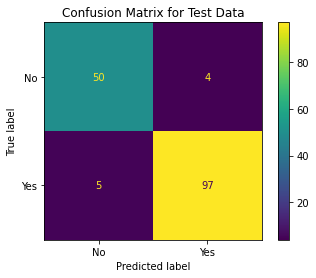

In [26]:
CV_dataframe_train = pd.DataFrame({'Accuracy_train':accuracy_train, 'F1_score_train':f1_score_train, 'Precision_train':precision_train, 'Recall_train':recall_train, 'r2_score_train':r2_train}, index=[0])
CV_dataframe_test = pd.DataFrame({'Accuracy_test':accuracy_test, 'F1_score_test':f1_score_test, 'Precision_test':precision_test, 'Recall_test':recall_test, 'r2_score_test':r2_test}, index=[0])
display(CV_dataframe_train)
display(CV_dataframe_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
disp_test.plot()
plt.title('Confusion Matrix for Test Data')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

### Evaluating Coefficients

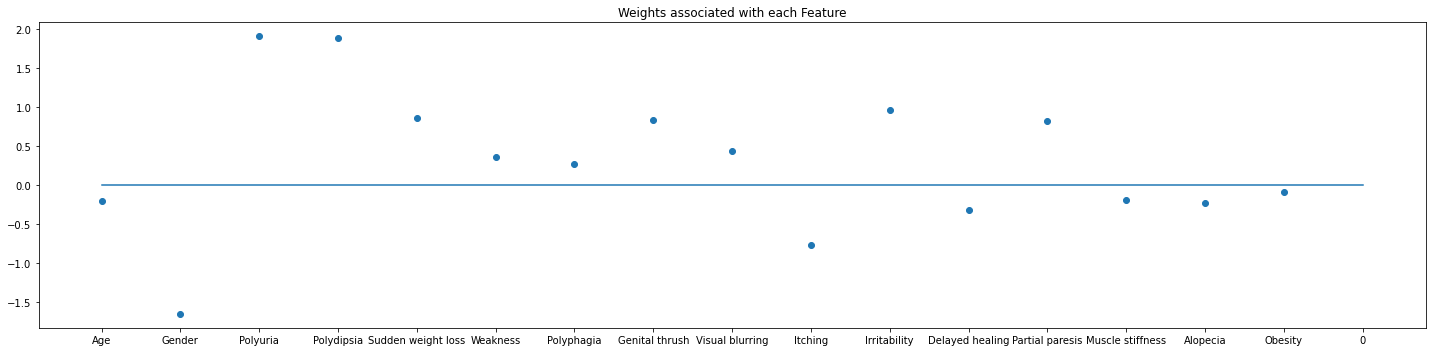

In [27]:
columns = dataset.columns
columns = list(columns)
columns.remove('Diabetes')
coeffs = logistic_regression.coef_

plt.figure(figsize = (20,5))
plt.scatter(columns, coeffs)
plt.plot(["Age",0], [0,0])
plt.title('Weights associated with each Feature')
plt.tight_layout()

## Model if we drop our proposed columns (Itching and Delayed healing)

,Accuracy_train,F1_score_train,Precision_train,Recall_train,r2_score_train
0,0.914835,0.9274,0.947368,0.908257,0.645469


,Accuracy_test,F1_score_test,Precision_test,Recall_test,r2_score_test
0,0.923077,0.94,0.959184,0.921569,0.660131


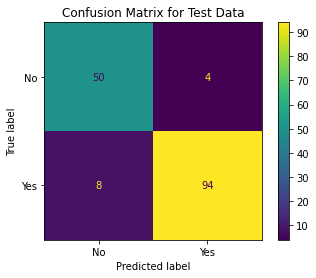

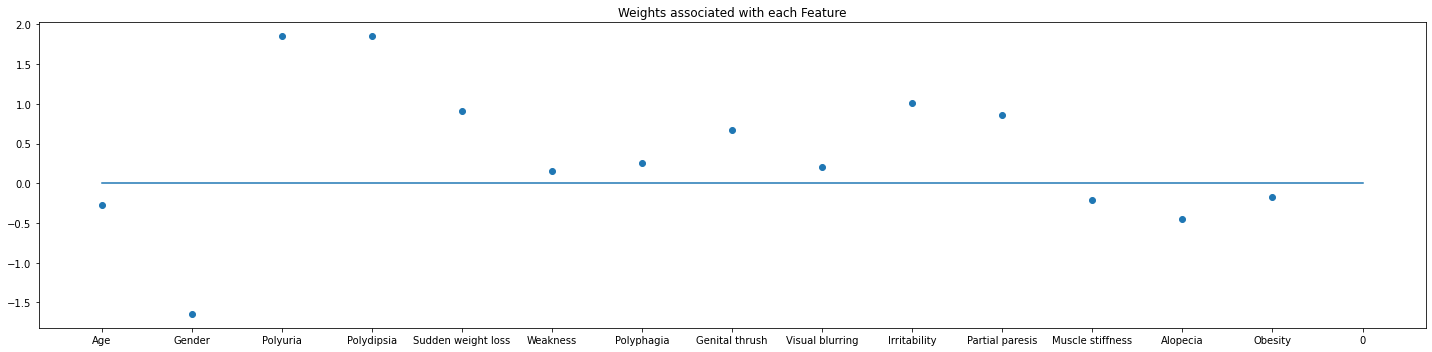

In [28]:
X = dataset.drop(columns=['Diabetes', 'Itching', 'Delayed healing'])
Y = dataset[['Diabetes']]
scalar = StandardScaler()
X[['Age']] = scalar.fit_transform(X[['Age']])

X = X.to_numpy()
Y = Y.to_numpy()

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Logisitic Regression Classifier
classifier = LogisticRegressionCV(random_state=0)
logistic_regression = classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

#evaluating classifier results
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

#plotting classifier results
CV_dataframe_train = pd.DataFrame({'Accuracy_train':accuracy_train, 'F1_score_train':f1_score_train, 'Precision_train':precision_train, 'Recall_train':recall_train, 'r2_score_train':r2_train}, index=[0])
CV_dataframe_test = pd.DataFrame({'Accuracy_test':accuracy_test, 'F1_score_test':f1_score_test, 'Precision_test':precision_test, 'Recall_test':recall_test, 'r2_score_test':r2_test}, index=[0])
display(CV_dataframe_train)
display(CV_dataframe_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
disp_test.plot()
plt.title('Confusion Matrix for Test Data')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

columns = dataset.columns
columns = list(columns)
columns.remove('Diabetes')
columns.remove('Itching')
columns.remove('Delayed healing')

coeffs = logistic_regression.coef_

plt.figure(figsize = (20,5))
plt.scatter(columns, coeffs)
plt.plot(["Age",0], [0,0])
plt.title('Weights associated with each Feature')
plt.tight_layout()

## What if we drop the column "gender" ?

,Accuracy_train,F1_score_train,Precision_train,Recall_train,r2_score_train
0,0.903846,0.916067,0.959799,0.876147,0.599724


,Accuracy_test,F1_score_test,Precision_test,Recall_test,r2_score_test
0,0.884615,0.911765,0.911765,0.911765,0.490196


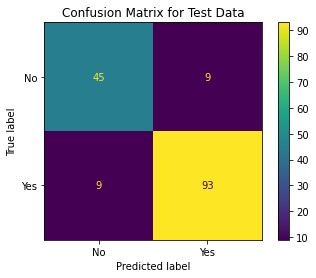

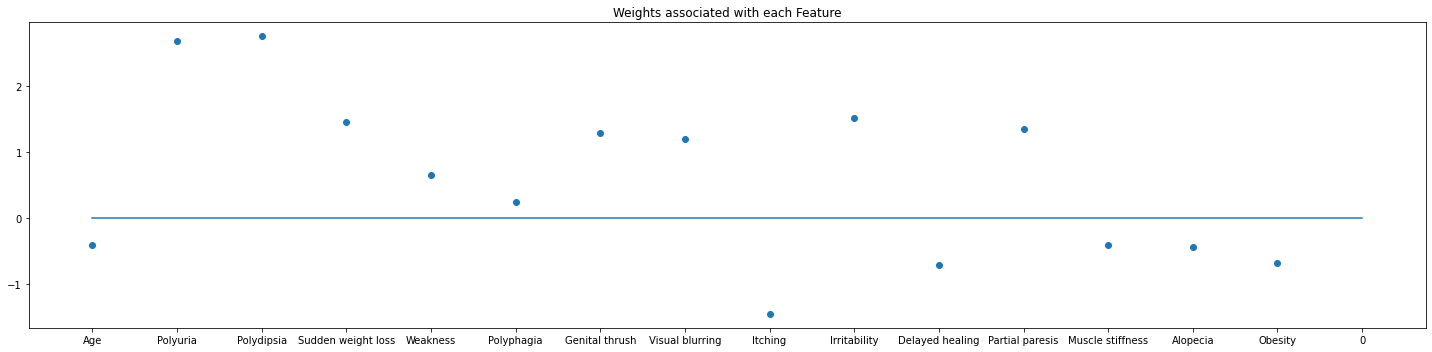

In [29]:
X = dataset.drop(columns=['Diabetes', 'Gender'])
Y = dataset[['Diabetes']]
scalar = StandardScaler()
X[['Age']] = scalar.fit_transform(X[['Age']])

X = X.to_numpy()
Y = Y.to_numpy()

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Logisitic Regression Classifier
classifier = LogisticRegressionCV(random_state=0)
logistic_regression = classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

#evaluating classifier results
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

#plotting classifier results 
CV_dataframe_train = pd.DataFrame({'Accuracy_train':accuracy_train, 'F1_score_train':f1_score_train, 'Precision_train':precision_train, 'Recall_train':recall_train, 'r2_score_train':r2_train}, index=[0])
CV_dataframe_test = pd.DataFrame({'Accuracy_test':accuracy_test, 'F1_score_test':f1_score_test, 'Precision_test':precision_test, 'Recall_test':recall_test, 'r2_score_test':r2_test}, index=[0])
display(CV_dataframe_train)
display(CV_dataframe_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
disp_test.plot()
plt.title('Confusion Matrix for Test Data')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

columns = dataset.columns
columns = list(columns)
columns.remove('Diabetes')
columns.remove('Gender')

coeffs = logistic_regression.coef_

plt.figure(figsize = (20,5))
plt.scatter(columns, coeffs)
plt.plot(["Age",0], [0,0])
plt.title('Weights associated with each Feature')
plt.tight_layout()